---
# <center> Лабораторна робота №5 </center>
## **Тема. Алгоритми пошуку**
## **Мета:** засвоїти варіанти реалізації алгоритмів пошуку засобами Python і методи оцінювання їх складності.
---

## <center> Хід роботи </center>

### **1.** Створюємо Notebook-документ і реалізовуємо контрольні приклади, що розглядаються у цій роботі, та виконуємо завдання, для самостійної роботи.
### <center> Завдання для самостійної роботи </center>

#### **1)** Оцінюємо асимптотичну складність алгоритму лінійного пошуку в О-нотації.

In [102]:
def linear_search(arr, target):
    for i, val in enumerate(arr):
        if val == target:
            return i
    return -1

# Приклад використання
arr = [4, 2, 1, 7, 9]
target = 7
result = linear_search(arr, target)
print("Індекс елемента:", result)  # Виведе: Індекс елемента: 3

Індекс елемента: 3


Асимптотична складність лінійного пошуку:
- Найгірший випадок: 
$𝑂(𝑛)$ — перевіряємо всі 𝑛 елементів.
- Найкращий випадок: 
$𝑂(1)$ — елемент на першій позиції.

#### **2)** Оцінюємо асимптотичну складність алгоритму бінарного пошуку в О-нотації.

In [106]:
def binary_search(arr, target):
    left, right = 0, len(arr) - 1
    while left <= right:
        mid = (left + right) // 2  # Знаходимо середній індекс
        if arr[mid] == target:    # Якщо середній елемент — шуканий
            return mid
        elif arr[mid] < target:   # Шуканий елемент у правій половині
            left = mid + 1
        else:                     # Шуканий елемент у лівій половині
            right = mid - 1
    return -1  # Елемент не знайдено

# Використання
arr = [1, 3, 7, 5, 9, 11]
target = 7
print(binary_search(arr, target))  # Виведе: 2

2


Асимптотична складність алгоритму бінарного пошуку:
- Найгірший випадок: $O(\log n)$ — кількість елементів, які потрібно перевірити, зменшується вдвічі на кожній ітерації.
- Найкращий випадок: $𝑂(1)$ — шуканий елемент знаходиться на середній позиції на першій ітерації.

#### **3)** Пишемо функцію, яка б могла повертати датафрейм з таким складом полів: («n», «time»), де n – розмір масиву для функції linear_searh();

In [110]:
import pandas as pd
import time
import random

# Реалізація функції linear_search
def linear_search(arr, target):
    for i, val in enumerate(arr):
        if val == target:
            return i
    return -1

# Функція для створення датафрейму
def measure_linear_search():
    results = []  # Список для збереження результатів
    sizes = [10, 100, 1000, 5000, 10000, 50000]  # Розміри масивів для тестування
    
    for n in sizes:
        arr = list(range(n))  # Генеруємо масив розміру n
        target = random.randint(0, n - 1)  # Випадковий елемент як ціль
        
        # Множимо на 10, щоб збільшити час виконання
        start_time = time.time()
        for _ in range(10):  # Виконати 10 разів
            linear_search(arr, target)
        end_time = time.time()
        
        elapsed_time = (end_time - start_time) / 10  # Обчислюємо середній час
        results.append({"n": n, "time": elapsed_time})  # Зберігаємо результат
    
    # Створюємо датафрейм з результатів
    df = pd.DataFrame(results)
    return df

# Використання функції
df = measure_linear_search()
print(df)

       n      time
0     10  0.000000
1    100  0.000000
2   1000  0.000000
3   5000  0.000151
4  10000  0.000101
5  50000  0.000401


#### **4)** Пишемо функцію, яка б могла повертати датафрейм з таким складом полів: («n», «time»), де n – розмір масиву для функції bin_searh();

In [113]:
import pandas as pd
import timeit
import random

# Реалізація функції binary_search
def binary_search(arr, target):
    left, right = 0, len(arr) - 1
    while left <= right:
        mid = (left + right) // 2  # Знаходимо середній індекс
        if arr[mid] == target:    # Якщо середній елемент — шуканий
            return mid
        elif arr[mid] < target:   # Шуканий елемент у правій половині
            left = mid + 1
        else:                     # Шуканий елемент у лівій половині
            right = mid - 1
    return -1  # Елемент не знайдено

# Функція для створення датафрейму
def measure_binary_search():
    results = []  # Список для збереження результатів
    sizes = [10, 100, 1000, 5000, 10000, 50000]  # Розміри масивів для тестування
    
    for n in sizes:
        arr = list(range(n))  # Генеруємо відсортований масив розміру n
        target = random.randint(0, n - 1)  # Випадковий елемент як ціль
        
        # Використовуємо timeit для точнішого вимірювання часу
        stmt = f"binary_search({arr}, {target})"
        setup = "from __main__ import binary_search"
        elapsed_time = timeit.timeit(stmt, setup, number=10)  # Виконуємо 10 разів
        
        results.append({"n": n, "time": elapsed_time / 10})  # Обчислюємо середній час
    
    # Створюємо датафрейм з результатів
    df = pd.DataFrame(results)
    return df

# Використання функції
df = measure_binary_search()
print(df)


       n          time
0     10  9.399999e-07
1    100  9.000003e-07
2   1000  2.990000e-06
3   5000  1.171000e-05
4  10000  2.330000e-05
5  50000  2.596400e-04


#### **5)** За результатами попередніх завдань будуємо графіки залежності часуви конання процедури пошуку від розміру масиву.

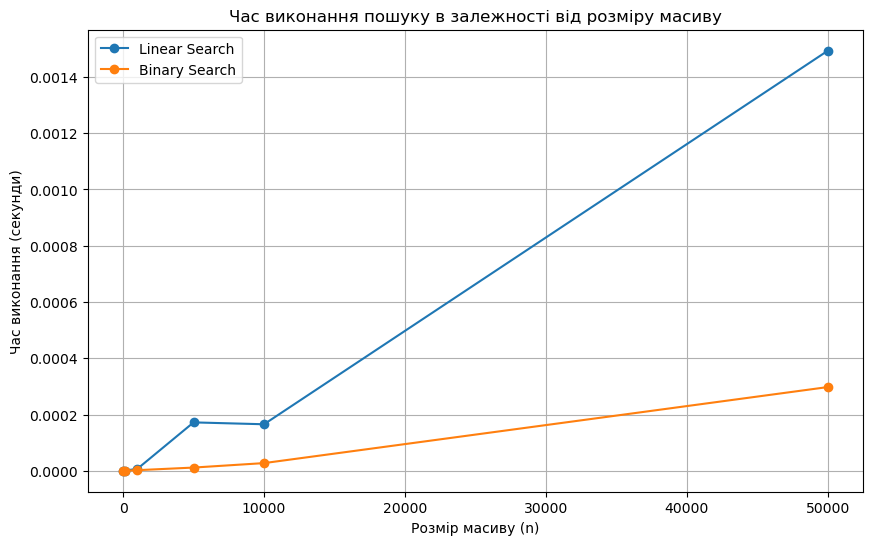

In [116]:
import pandas as pd
import timeit
import random
import matplotlib.pyplot as plt

# Реалізація функції linear_search
def linear_search(arr, target):
    for i, val in enumerate(arr):
        if val == target:
            return i
    return -1

# Реалізація функції binary_search
def binary_search(arr, target):
    left, right = 0, len(arr) - 1
    while left <= right:
        mid = (left + right) // 2  # Знаходимо середній індекс
        if arr[mid] == target:    # Якщо середній елемент — шуканий
            return mid
        elif arr[mid] < target:   # Шуканий елемент у правій половині
            left = mid + 1
        else:                     # Шуканий елемент у лівій половині
            right = mid - 1
    return -1  # Елемент не знайдено

# Функція для вимірювання часу для лінійного пошуку
def measure_linear_search():
    results = []  # Список для збереження результатів
    sizes = [10, 100, 1000, 5000, 10000, 50000]  # Розміри масивів для тестування
    
    for n in sizes:
        arr = list(range(n))  # Генеруємо масив розміру n
        target = random.randint(0, n - 1)  # Випадковий елемент як ціль
        
        stmt = f"linear_search({arr}, {target})"
        setup = "from __main__ import linear_search"
        elapsed_time = timeit.timeit(stmt, setup, number=10)  # Виконуємо 10 разів
        
        results.append({"n": n, "time": elapsed_time / 10})  # Обчислюємо середній час
    
    # Створюємо датафрейм з результатів
    df = pd.DataFrame(results)
    return df

# Функція для вимірювання часу для бінарного пошуку
def measure_binary_search():
    results = []  # Список для збереження результатів
    sizes = [10, 100, 1000, 5000, 10000, 50000]  # Розміри масивів для тестування
    
    for n in sizes:
        arr = list(range(n))  # Генеруємо відсортований масив розміру n
        target = random.randint(0, n - 1)  # Випадковий елемент як ціль
        
        stmt = f"binary_search({arr}, {target})"
        setup = "from __main__ import binary_search"
        elapsed_time = timeit.timeit(stmt, setup, number=10)  # Виконуємо 10 разів
        
        results.append({"n": n, "time": elapsed_time / 10})  # Обчислюємо середній час
    
    # Створюємо датафрейм з результатів
    df = pd.DataFrame(results)
    return df

# Виконання обох вимірювань
df_linear = measure_linear_search()
df_binary = measure_binary_search()

# Побудова графіків
plt.figure(figsize=(10, 6))

# Лінійний пошук
plt.plot(df_linear['n'], df_linear['time'], label='Linear Search', marker='o')

# Бінарний пошук
plt.plot(df_binary['n'], df_binary['time'], label='Binary Search', marker='o')

# Додавання заголовка та підписів
plt.title('Час виконання пошуку в залежності від розміру масиву')
plt.xlabel('Розмір масиву (n)')
plt.ylabel('Час виконання (секунди)')
plt.legend()

# Відображення графіку
plt.grid(True)
plt.show()


#### **6)** Оцінюємо, який з двох алгоритмів є ефективнішим і в якому діапазоні розміру задачі.

З графіків, побудованих раніше, можна побачити, що лінійний пошук зростає пропорційно розміру масиву, а бінарний пошук — набагато повільніше. На малих розмірах масивів час виконання обох алгоритмів може бути схожим, але на великих масивах бінарний пошук стане значно ефективнішим.

### **2.** Надаємо відповіді на контрольні запитання.
### <center> Контрольні питання </center>

#### **1)** Сформулювати задачу пошуку.
Формулювання задачі пошуку:

**Задача:**

Нехай є масив $ A = [a_1, a_2, a_3, ..., a_n] $ довжиною $ n $, де $ n $ — ціле число. Потрібно знайти індекс елемента $ x $, який задовольняє умову $ x = a_i $ для деякого індексу $ i $, або вивести повідомлення про те, що елемент не знайдений в масиві.

**Вхід:**

Масив $ A $ довжиною $ n $, що містить елементи (може бути відсортованим або не відсортованим).
Шукаємий елемент $ x $.

**Вихід:**

Якщо елемент $ x $ присутній у масиві, повернути його індекс $ i $ (де $ A[i] = x $).
Якщо елемент не знайдений, повернути значення $ -1 $ або інший індикатор відсутності елемента.

#### **2)** Які критерії можна використовувати для оцінювання ефективності алгоритмів пошуку?
**Основні критерії для оцінки ефективності алгоритмів пошуку:**
- Часова складність (Time Complexity):

Лінійний пошук — $O(n)$, бінарний пошук — $O(\log n)$. Чим менший час, тим ефективніший алгоритм для великих масивів.
- Просторова складність (Space Complexity):

Лінійний та бінарний пошук зазвичай мають складність $O(1)$.
- Стабільність (Stability):

Важлива, якщо необхідно зберегти порядок елементів.
- Простота реалізації (Simplicity):

Лінійний пошук простіший, бінарний — складніший (потрібен відсортований масив).
- Підтримка різних типів даних (Data Support):

Лінійний пошук працює з будь-яким типом даних, бінарний — тільки з відсортованими масивами.
- Гнучкість (Flexibility):
  
Лінійний пошук підходить для динамічних масивів, бінарний вимагає попередньої обробки.
- Наявність попередніх знань (Preprocessing Requirements):
  
Бінарний пошук вимагає сортування, що додатково збільшує складність.
- Стійкість до великих даних (Scalability):
  
Бінарний пошук краще масштабується для великих обсягів даних.
- Обробка частих оновлень даних (Handling Frequent Updates):
  
Лінійний пошук зручніший для динамічних даних.

Вибір залежить від розміру даних і вимог до швидкості.

#### **3)** Що таке лінійний пошук і яка його асимптотична складність?
Лінійний пошук — це алгоритм пошуку елемента в масиві або списку, який перевіряє кожен елемент послідовно, поки не знайде шуканий елемент або не досягне кінця масиву.

**Асимптотична складність:**
- Часова складність: $O(n)$, де $n$ — кількість елементів у масиві. Алгоритм може потребувати перевірити всі елементи.
- Просторова складність: $O(1)$, оскільки лінійний пошук не вимагає додаткової пам'яті, крім змінних для індексу та значення.

#### **4)** Що таке бінарний (двійковий) пошук і в чому полягає його головний принцип роботи?
Бінарний пошук — це ефективний алгоритм пошуку елемента в відсортованому масиві або списку. Він використовує принцип розподілу даних навпіл, що дозволяє значно скоротити кількість порівнянь у порівнянні з лінійним пошуком.

**Головний принцип роботи:**
- Початкова перевірка середнього елемента:

Алгоритм починає з перевірки середнього елемента масиву (або підмасиву).
Якщо цей елемент є шуканим, алгоритм завершить пошук.
- Розбиття масиву:

Якщо середній елемент не є шуканим, алгоритм порівнює його з шуканим елементом.
Якщо шуканий елемент менший за середній, пошук продовжується в лівій частині масиву.
Якщо шуканий елемент більший за середній, пошук продовжується в правій частині масиву.
- Повторення кроків:

Масив постійно поділяється на половини, і пошук повторюється в одній з них, поки не буде знайдений елемент або поки не буде перевірено всі можливі варіанти.

#### **5)** Які переваги і недоліки використання бінарного пошуку порівняно з лінійним?
**Переваги бінарного пошуку порівняно з лінійним:**
- Швидкість пошуку:

Бінарний пошук має значно меншу часову складність — $O(\log n)$, в порівнянні з лінійним пошуком — $O(n)$.
Це означає, що для великих масивів бінарний пошук буде значно швидшим, оскільки на кожному кроці він зменшує область пошуку вдвічі.
- Ефективність на великих даних:

Для великих масивів, де $n$ може бути величезним, бінарний пошук дозволяє знаходити елементи за значно менший час.
- Меньше порівнянь:

Бінарний пошук зазвичай потребує меншої кількості порівнянь, оскільки з кожним кроком він відсікає половину даних, що не відповідають критеріям пошуку.

**Недоліки бінарного пошуку порівняно з лінійним:**
- Необхідність попереднього сортування:

Бінарний пошук працює тільки на відсортованих масивах. Якщо масив не відсортований, його потрібно спочатку відсортувати, що має часову складність $O(n \log n)$. Це додає додаткову витрату часу, і для маленьких масивів лінійний пошук може бути ефективнішим.
- Значна складність для динамічних даних:

Якщо дані часто змінюються (наприклад, часто додаються нові елементи), сортування масиву після кожної зміни може бути накладним. Лінійний пошук може бути зручнішим у таких випадках, оскільки він не вимагає попереднього сортування.
- Потреба в додаткових перевірках:

Для коректної роботи бінарного пошуку необхідно правильно керувати індексами лівої та правої межі підмасиву (особливо при роботі з великими масивами та рекурсивними викликами), що може бути складніше в реалізації.

#### **6)** Які ще алгоритми пошуку існують, окрім лінійного і бінарного?
Окрім лінійного та бінарного пошуку, існують такі алгоритми пошуку:

**Пошук у хеш-таблиці:**

- Часова складність: $O(1)$ у середньому.
- Застосування: Швидкий доступ до елементів за допомогою хеш-функцій.
  
**Пошук у дереві (бінарне дерево пошуку):**

- Часова складність: $O(\log n)$ (сбалансоване дерево).
- Застосування: Пошук, вставка, видалення в дереві.
  
**Пошук у графах (DFS, BFS):**

- Часова складність: $O(V + E)$ (де $V$ — кількість вершин, $E$ — кількість ребер).
- Застосування: Пошук шляхів, компонент зв'язності в графах.
  
**Експоненціальний пошук:**

- Часова складність: $O(\log n)$.
- Застосування: Пошук у дуже великих або безкінечних масивах.
  
**Інтерполяційний пошук:**

- Часова складність: $O(\log \log n)$ (кращий випадок).
- Застосування: Пошук в числових масивах з рівномірним розподілом.
  
**Пошук за допомогою пропуску (Skip List):**

- Часова складність: $O(\log n)$.
- Застосування: Швидкий пошук у відсортованих даних.
  
**Фібоначчі пошук:**

- Часова складність: $O(\log n)$.
- Застосування: Пошук у відсортованих масивах з використанням чисел Фібоначчі.
Кожен алгоритм має свої переваги в залежності від структури даних і специфіки задачі.